In [4]:
import pandas as pd

cpi = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/US CPI project/us-consumer-spending-inflation/data/processed/CPIAUCSL.csv')
pce = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/US CPI project/us-consumer-spending-inflation/data/processed/PCE_clean.csv')
dspi = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/US CPI project/us-consumer-spending-inflation/data/processed/DSPI_cleaned.csv')
pcepi = pd.read_csv('/Users/anhnguyendo/Documents/Python machine learning/US CPI project/us-consumer-spending-inflation/data/processed/PCEPILFE_cleaned.csv')

In [16]:
#convert date column of each dataset to 'datetime'
cpi['date'] = pd.to_datetime(cpi['date'])
pce['date'] = pd.to_datetime(pce['date'])
dspi['date'] = pd.to_datetime(dspi['date'])
pcepi['date'] = pd.to_datetime(pcepi['date'])

In [19]:
cpi.head()

,realtime_start,date,value
0,2025-04-21,2010-01-01,217.488
1,2025-04-21,2010-02-01,217.281
2,2025-04-21,2010-03-01,217.353
3,2025-04-21,2010-04-01,217.403
4,2025-04-21,2010-05-01,217.290


In [20]:
pce.head()

,date,value,real_pce
0,2010-01-01,10056.1,11252.461731
1,2010-02-01,10093.4,11284.350334
2,2010-03-01,10156.0,11337.478650
3,2010-04-01,10182.3,11361.004184
4,2010-05-01,10210.8,11380.232714


In [21]:
dspi.head()

,date,value
0,2010-01-01,11073.7
1,2010-02-01,11079.0
2,2010-03-01,11138.2
3,2010-04-01,11240.7
4,2010-05-01,11328.4


In [22]:
cpi.head()

,realtime_start,date,value
0,2025-04-21,2010-01-01,217.488
1,2025-04-21,2010-02-01,217.281
2,2025-04-21,2010-03-01,217.353
3,2025-04-21,2010-04-01,217.403
4,2025-04-21,2010-05-01,217.290


In [17]:
#merge into one dataframe
df = pd.merge(cpi,pce,on = 'date', how = 'inner', suffixes = ('_cpi','_pce'))
df = pd.merge(df, dspi, on ='date', how ='inner')
df.head()

,realtime_start,date,value_cpi,value_pce,value
0,2025-04-21,2010-01-01,217.488,10056.1,11073.7
1,2025-04-21,2010-02-01,217.281,10093.4,11079.0
2,2025-04-21,2010-03-01,217.353,10156.0,11138.2
3,2025-04-21,2010-04-01,217.403,10182.3,11240.7
4,2025-04-21,2010-05-01,217.290,10210.8,11328.4


In [ ]:
#find the real personal consumption expenditure adjusted with inflation
pce['real_pce'] = pce['value'] / (pcepi['value'] / 100)

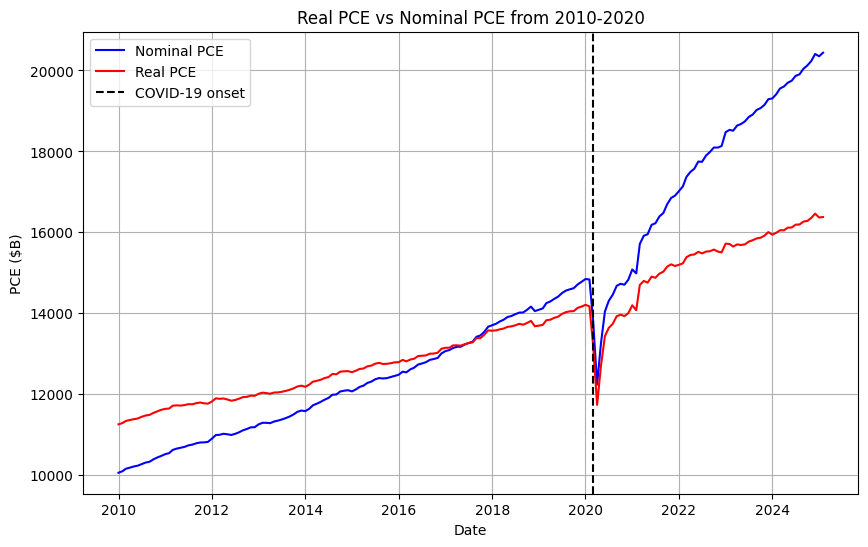

In [27]:
import matplotlib.pyplot as plt
import matplotlib_inline

plt.figure(figsize=(10,6))
plt.plot(pce['date'], pce['value'], label = 'Nominal PCE', color = 'blue')
plt.plot(pce['date'], pce['real_pce'], label = 'Real PCE', color = 'red')
covid_date = pd.to_datetime("2020-03-01")
plt.axvline(x=covid_date, color='black', linestyle='--', linewidth=1.5, label='COVID-19 onset')
plt.xlabel('Date')
plt.ylabel('PCE ($B)')
plt.title('Real PCE vs Nominal PCE from 2010-2020')
plt.legend()
plt.grid()
plt.show()

From the graph above, we can easily seperate the graphs into two distint periods, before and after 2016

From 2010 to 2016, the Nominal PCE is consistently below the Real PCE. There are several reasons:
    1. Inflation was low and stable
        - if real pce always higher than nominal pce, we can safely assum that the PCEPI inflation index is less than 100, meaning the prices can be lower or close to the same with last year
        - It suggests that inflation was not outpacing consumer spending growth — a sign of strong real consumption power.
    2. Consumer purchase was strong
        - Simililary, the reason that the nominal pce can be lower than real pce is that during 2010-2016, consumers could be able to buy more using the same 1 dollar they have yesterday.
    3. Interpretation
        - From 2010–2016, inflation was relatively mild. As a result, when adjusted for inflation, consumer spending in real terms (Real PCE) exceeded the nominal figures, reflecting increased purchasing power and real growth in consumption behavior.
    
During 2016 to now:
    1. During 2016
        - In 2020, both Real and Nominal PCE dropped sharply, aligning with the onset of the COVID-19 pandemic and its disruptive impact on the economy. However, in the recovery period following 2020, both metrics rebounded — but with a key difference: Nominal PCE began to outpace Real PCE.
    2. 2016 till now
        - The increase in nominal spending was increasingly driven by rising prices rather than higher consumption volumes. In simple terms, inflation surged, and consumers were spending more dollars — not because they were buying more, but because prices themselves were higher. This post-pandemic inflationary pressure is clearly reflected in the widening gap between nominal and real consumption.

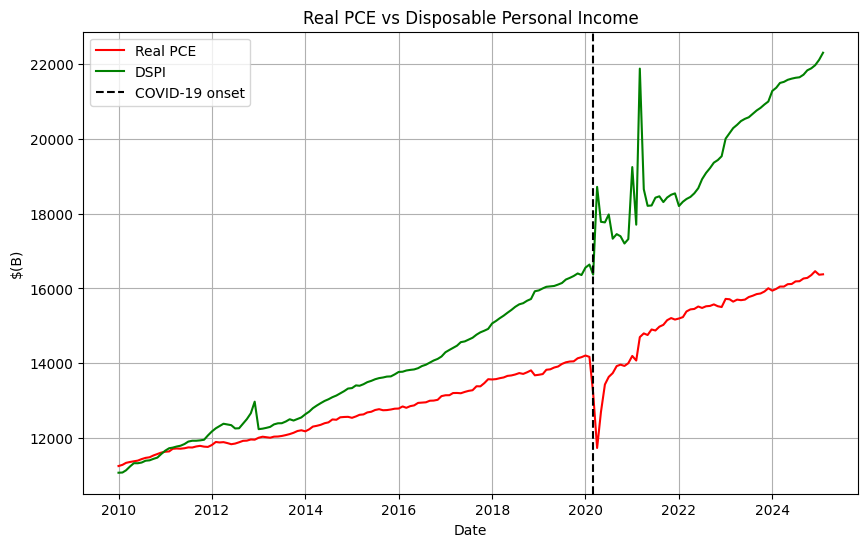

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(pce['date'], pce['real_pce'], label='Real PCE', color = 'red')
plt.plot(dspi['date'], dspi['value'], label='DSPI', color = 'green')
covid_date = pd.to_datetime("2020-03-01")
plt.axvline(x=covid_date, color='black', linestyle='--', linewidth=1.5, label='COVID-19 onset')
plt.title("Real PCE vs Disposable Personal Income")
plt.xlabel("Date")
plt.ylabel("$(B)")
plt.legend()
plt.grid()
plt.show()


During the 2010s, when Real PCE exceeds Disposable Personal Income (DSPI), it suggests consumers were spending nearly all (or more than all) of their after-tax income. This could indicate that during 2010s, the consumers had higher consumer realiances, they also received lower saving rates or possibly still recovering from the 2008 crisis. In general, the graph suggest that the consumers spent a big portion of their disposable income.

Later years, when the gap between DSPI and real PCE are bigger and DSPI outpace the real PCE, it suggests that consumers now that have more disposble income that they are spending. There are several reasons. People are more cautios which their money and also increase in the saving behavior. 

The dramatic spikes in Disposable Personal Income (DSPI) during 2020 and 2021 are not just natural economic behavior. They’re largely the result of extraordinary government policies introduced in response to the COVID-19 pandemic. According to my research, some of the important policies such as Stimulus payments, expanded unemployment benefit and child tax credit expansions significantly help each household gained more income. While DSPI spiked, Real PCE did not rise at the same rate, suggesting a rise in savings or delayed consumption behavior, driven by uncertainty and constrained spending options.

Overall, during the early 2010s, Real PCE occasionally exceeded Disposable Personal Income (DSPI), suggesting that consumers were spending a large share — or possibly more than — their after-tax income. This reflects either low savings rates or reliance on credit.
However, in later years, DSPI consistently outpaced Real PCE, indicating a shift in behavior: either a rise in household savings, more conservative consumption, or an increase in disposable income that was not fully translated into spending. The widening gap post-2020 is especially notable and could be influenced by fiscal stimulus and changing consumer expectations in the inflationary recovery period.